<a href="https://colab.research.google.com/github/DenisVIvanov/Dipl_Data_Scientist/blob/main/Behavioral_scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ПОВЕДЕНЧЕСКИЙ СКОРИНГ

Задача по настоящему исследованию представлена "Альфа Банк" в рамках открытого чемпионата по анализу данных AlfaBattle 2.0 проводимого на сайте Boosters.pro

[подробнее о чемпионате](https://boosters.pro/championship/alfabattle2/overview)

В составе задачи представлены обезличенные данные об истории платежей по картам клиентов Банка, представивших заявку на получение кредита (кредитной карты),  а также отметка о попадании кредитной карты в дефолт в близком будущем (12 мес) и поставлена цель - рассчитать вероятность дефолта.

# 1. Содержание проекта


## 1.1 Цели проекта

Цели в бизнесе: 
- обеспечить наилучшую точность предсказания выхода Заёмщика на дефолт по кредитной карте исходя из данных о платежах по банковским картам в прошлом 

Решение бизнес - задачи позволит, оптимизировать фильтр хороших клиентов на входе в банковский продукт «Кредитная карта», что решит задачи бизнеса:
- сокращение издержек на взыскание и списание плохих долгов по кредитным картам, повышение рентабельности по продукту;
- внедрение / упрощение процедур выдач предварительно одобренных кредитных карт существующим клиентам (только на основании предшествующих транзакций, без запроса кредитной истории).

Цели в науке:
- разработать инструменты трансформации  данных о проводках по банковским картам в универсальные метрики (потребительского) поведения,
представить пространство признаков поведения.


## 1.2 Бизнес окружение / контекст задачи

Контекст решения бизнес - задачи: бизнес процесс выдачи новой кредитной карты  Клиенту Банка, уже использующему другие карты Банка.

Кредитная карта – продукт, подразумевающий возможность Клиента: 
- быстро получить небольшую сумму денег (1-3 среднемесячных дохода) 
- без контроля потратить
- не гасить тело кредита достаточно долго (только при нарушении грейс периода)

Решение получения кредитной карты (как  правило)  **стихийно** и формируется относительно  **быстро**  (это не ипотека).  

Существующие базовые скоринг модели основаны на статичных метриках: социальных  (пол, возраст, семейное положение и т д), метриках кредитной истории (метрики  случаев просрочки в прошлом, сумма кредитной нагрузки),  а также метриках  дохода. Все эти метрики сформированы **давно**,  обновляются **медленно**. они не применимы  для описания быстрых / порой стихийных / мотивов в поведении.

Включение в модели кредитного анализа метрик, основанных на данных о фактически проведенных платежах клиента позволит устранить такое несоответствие и повысить точность фильтра клиентов на входе в продукт  
[Описание от Boosters.pro](https://boosters.pro/championship/alfabattle2_sand/overview)

##  1.3. Общее описание датасета


Датасет представляет собой свод данных о транзакциях по банковским картам клиентов Альфа Банка, подавших заявку на получение кредитной карты.
Данные представлены за период от нескольких дней до 1 года.
В отношении каждой транзакции представлены метрики:
- суммы транзакции
- признак списания / зачисления денежных средств по транзакции
- цели платежа (mcc код)
- виды банковских продуктов и сервисов, в рамках которых осуществлялся платеж (вид и классификация банковских карт, по которым осуществлялся платеж, признаки платежных систем, признак электронной коммерции и т п)
- время платежа (день, недаля, периоды между платежами)
- география (город и страна платежа)


В отношении каждой заявки на выдачу кредитной карты представлены сведения: 
- банковский продукт кредитной карты, 
- факт выхода на дефолт кредитной карты в будущем

Значение целевой переменной:
- отражает факт выхода на просрочку по карте в течение первых 12 месяцев после выдачи
значение поведенческих метрик  в областях отличных от нормального / рационального  поведения (явное мошенничество или неадекватная оценка финансовых возможностей)
- несбалансированно относительно основной выборки наблюдений – плохие наблюдения -  2,7 % выборки

##  1.4. Метрики качества решения

Метрика оценки качества решения задачи - ROC- AUC 

# 2. Аналогичные исследования подобных задач в прошлом

Анализ аналогичных исследований проводился на базе материалов чемпионата AlfaBattle:

[Baseline /код](https://github.com/smirnovevgeny/AlfaBattle2.0)

[Baseline /презентации](https://www.youtube.com/watch?v=A3S9ecblw98&list=PLrKK62YTZRia0nk7HDFDTkjwmZwb6suzZ)

[Лучшее публичное решение /код](https://github.com/aizakharov94/AlfaBattle_task2)

[Лучшее публичное решение /презентации](https://youtu.be/A7ha6mRUnhc?t=6481)

[Kaggle - публичные решения](https://www.kaggle.com/sokolovaleks/alfabattle2-sandbox/code)

Ключевые инструменты решения, использованные при решении задачи в прошлом:


Feature Engeneering
*   использование всех метрик датасета по умолчанию, вне зависимости от степени их содержательной значимости, логик влияния на результирующее событие, а также без учета содержательного /смыслового  пересечения метрик,
*   использование меток времени средних по всем транзакциям клиента вне зависимости от содержательного наполнения средних по сути,
*   все события датасета по умолчанию принимались равно значимыми на результирующее событие, вне зависимости от времени прошедшего с даты транзакции на результирующее событие и изменений в поведени за это время (кроме решений на базе RNN), 
*   использование стандартных статистических метрик в отношении каждой из категориальных переменных датасета.
Ключевые различия публичных решений  - по составу использованных фичей.

Данные датасета принимались в модель в следующих основных видах / формах:
- вещественные признаки - в исходном виде,
- категориальные признаки в сумме транзакции или в исходном виде или в виде временного ряда по факту принадлежности категориального признака отдельному значенияю временного ряда,

В рамках бейзлайнов и публичных решений не применялись:
- инструменты масштабирования значений датесета, в результате в модели параллельно присутствовали единицы измерения (нормированных) рублей, дней и часов между транзакциями - очевиден перекос в рамках Feature_importances в пользу признаков времени, как имеющих наибольшие абсолютные значения
- отсечения выбросов,  
- инструменты балансирования / передискредтизации данных 


Построение модели

В большинстве представленных ML решений в качестве базовой модели принимались модели CatBoostClassifier  и LightGBM, принципиально схожие по логике работы и основаннные на использовании градиентного бустинга, различающиеся в рамках рабочих инструментов настройки.


Общие результаты работы baseline моделей решения задачи представлены ниже:




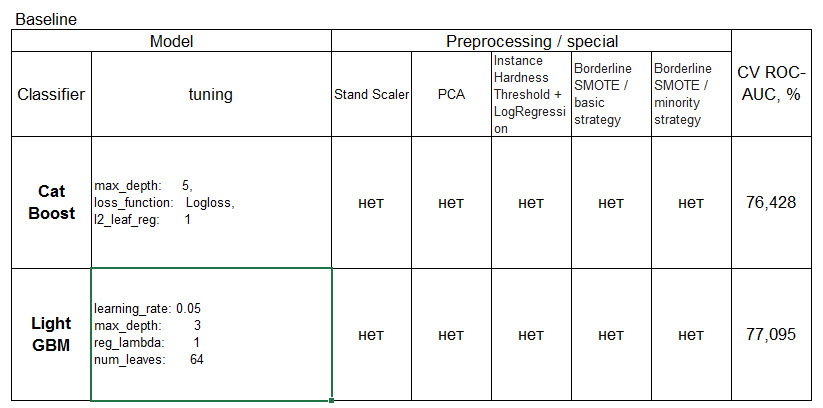

# 3. Подготовка к исследованию

## 3.1.  Импорт ключевых библиотек

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Base
import numpy as np
import pandas as pd
import re

# Import data
import gc
import os
import sys
from google.colab import drive 
import tqdm

# Modelling Algorithms  
from sklearn.decomposition import PCA
from sklearn.linear_model  import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

In [ ]:
pip install catboost

     |████████████████████████████████| 76.3 MB 90 kB/s 


In [ ]:
pip install lightgbm

In [ ]:
import catboost as cb
import lightgbm as lgb

In [ ]:
# Modelling Helpers  
from sklearn.model_selection import train_test_split , StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, roc_auc_score

from imblearn.over_sampling import BorderlineSMOTE, SMOTE
from imblearn.under_sampling import InstanceHardnessThreshold

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline

from IPython.display import Image

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## 3.2 Вспомогательные функции

In [ ]:
def fine_pivot(val, ind, col, aggf, data, title = None, x_l=None, y_l = None, 
               ann = True, marg = False):
    p_t = pd.pivot_table(data, 
                values  = val,  
                index   = ind,
                columns = col, 
                aggfunc = aggf,
                dropna = True,
                margins = marg)
    fig, ax = plt.subplots(figsize=(12,4))
    sns.heatmap(p_t, 
                annot = ann, 
                fmt='.3g', 
                cmap= 'YlGnBu', 
                linewidths=0.1, 
                linecolor='black'
                )
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.xlabel(x_l)
    plt.ylabel(y_l)
    plt.title(title)
    i, k = ax.get_ylim()
    ax.set_ylim(i+0.5, k-0.5)
    plt.show()

In [ ]:
def fine_table(table, title = None, x_l=None, y_l = None, 
               ):
    p_t = table
    fig, ax = plt.subplots(figsize=(12,6))
    sns.heatmap(p_t, 
                annot = True, 
                fmt ='.3', 
                cmap= 'YlGnBu', 
                linewidths=0.1, 
                linecolor='black'
                )
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.xlabel(x_l)
    plt.ylabel(y_l)
    plt.title(title)
    i, k = ax.get_ylim()
    ax.set_ylim(i+0.5, k-0.5)
    plt.show()

## 3.3 Загрузка данных и выделение ключевых признаков / код

3.3.1. Источники информации для анализа на Google Collab

In [ ]:
PATH                    = '/content/drive/My Drive/B_scoring/'

#os.mkdir(PATH + 'Fich_full')
#os.mkdir(PATH + 'Fich_short')
#os.mkdir(PATH + 'Fich_info')

TRAIN_TRANSACTIONS_PATH = PATH +'Data/train_tranactions_contest/'
Fich_full_PATH          = PATH + 'Fich_full/'
Fich_short_PATH         = PATH + 'Fich_short/'
Fich_info_PATH          = PATH + 'Fich_info/'

# Импорт файла с целевой переменной
df_flag = pd.read_csv(PATH +'Data/alfabattle2_sand_alfabattle2_train_target.csv')

3.3.2.  Базовая функция для запроса информации о транзакциях, хранящихся в составе 50 parquet -файлов на TRAIN_TRANSACTIONS_PATH в состав файлов, содержащих предобработанные датафреймы для построения моделей и справочную информацию

In [ ]:
def prepare_transactions_dataset(path_to_dataset: str, 
                                 num_parts_to_preprocess_at_once: int = 1, 
                                 num_parts_total: int=50,                    
                                 verbose: bool=False,
                                 form = 'full'):
    
    pre_frames_fm = []
    pre_frames_sm = []
    pre_info = []
    app_list = []

    for step in tqdm.tqdm_notebook(range(0, num_parts_total, 
                                         num_parts_to_preprocess_at_once), 
                                   desc="Transforming transactions data"):
        transactions_frame = read_parquet_dataset_from_local(path_to_dataset, 
                                                             step, 
                                                             num_parts_to_preprocess_at_once, 
                                                             verbose=verbose)
        
        # full model
        if form == 'full' or form == 'all': 
            features_fm = extract_agg_full_model(transactions_frame)
            pre_frames_fm.append(features_fm)

        # short model
        if form == 'short' or form == 'all':
            features_sm = extract_agg_short_model (transactions_frame)
            pre_frames_sm.append(features_sm)
        
        # info
        if form == 'info' or form == 'all':
            features_info = extract_info (transactions_frame)
            pre_info.append(features_info)
            app_list.append(transactions_frame.loc[:,['app_id', 'days_before',
                                                      'income_flag']])

    # full model
    if form == 'full' or form == 'all': 
        pre_frames_fm = pd.concat(pre_frames_fm)
        pre_frames_fm.columns = [str(x) for x in pre_frames_fm.columns]
        file_name = (Fich_full_PATH +'transactions_month_'+ path_to_dataset[-26:-21] +'.parquet')
        pre_frames_fm.to_parquet(file_name)

    # short model
    if form == 'short' or form == 'all':
        pre_frames_sm = pd.concat(pre_frames_sm)
        file_name = (Fich_short_PATH +'/trans_'+ path_to_dataset[-26:-21] +'.parquet')
        pre_frames_sm.to_parquet(file_name)

    # info
    if form == 'info' or form == 'all':
        pre_info = pd.concat(pre_info)
        file_name = (Fich_info_PATH +'info_'+path_to_dataset[-26:-21] +'.parquet')
        pre_info.to_parquet(file_name)

        app_list = pd.concat(app_list)
        file_name= (PATH +'Fich_info/app_list_'+ path_to_dataset[-26:-21] +'.parquet')
        app_list.to_parquet(file_name)

    return pre_frames_fm

3.3.3.  Базовая функция для предварительной обработкии пакета parquet файлов

In [ ]:
def read_parquet_dataset_from_local(path_to_dataset: str, 
                                    start_from: int = 0, 
                                    num_parts_to_read: int = 1, 
                                    verbose=False) -> pd.DataFrame:
    res = []
    dataset_paths = sorted([os.path.join(path_to_dataset, filename) 
                                for filename in os.listdir(path_to_dataset) 
                                if filename.startswith('part')])
    
    start_from = max(0, start_from)
    chunks = dataset_paths[start_from: start_from + num_parts_to_read]
    for chunk_path in tqdm.tqdm_notebook(chunks, desc="Reading dataset"):
        chunk = pd.read_parquet(chunk_path)
        res.append(chunk)
    return pd.concat(res).reset_index(drop=True)

3.3.4. Функция предобработки данных и формирования датасета для моделей обучечения CatBoostClassifier и LightGBM

In [ ]:
def extract_agg_full_model(t_frame: pd.DataFrame) -> pd.DataFrame:

    t_frame.drop_duplicates(keep='last')
    
    # приведение суммы транзакции к рублям
    t_frame['amnt']   = pd.Series(np.exp(t_frame['amnt']*17.8209)-1).astype('int')
    
    # только транзакции по расходам за последние 90 дней
    t_frame=t_frame.loc[(t_frame['income_flag']==1)&
                        (t_frame['days_before']<91)] 
                        
    # расчет средней суммы расходов по клиенту
    app_costs = t_frame.groupby(['app_id']).agg(
                                {'amnt': [  lambda x: np.sum(x),
                                            lambda x: np.max(x)
                                         ]}).reset_index()

    app_costs.columns = ['app_id', 'amnt_sum', 'amnt_max']
    t_frame             = pd.merge(t_frame, app_costs,on = 'app_id',how = 'left')

    #  расчет метрики в модель - расходы по признаку за последний месяц
    #  к среднемесячным расходам клиента
    t_frame                 = t_frame.loc[(t_frame['days_before']<31)]
    t_frame['amnt_norm']    = t_frame['amnt'] * 3 / t_frame['amnt_sum']                                 
    t_frame                 = t_frame.loc[:,['app_id', 'amnt_norm','mcc']]
    prept = []
    for i in t_frame.columns[2:]:
        pt = pd.pivot_table(data= t_frame, 
                        values  = 'amnt_norm',
                        index   = 'app_id',
                        columns = i, 
                        aggfunc = 'sum',
                        fill_value = 0)
        pt.columns = [i + '_' + str(x) for x in pt.columns]
        prept.append(pt)

    prept= pd.concat (prept, axis =1)
    prept= pd.merge(prept, app_costs.set_index('app_id'), 
                    right_index=True, left_index=True,
                    how='left')

    return prept

3.3.5. Функция предобработки данных и формирования датасета для моделей обучечения SGD Classifier  и RandomForestClassifier

In [ ]:
def extract_agg_short_model(t_frame: pd.DataFrame) -> pd.DataFrame:

    t_frame.drop_duplicates(keep='last')

    # приведение суммы транзакции к рублям
    t_frame['amnt']   = pd.Series(np.exp(t_frame['amnt']*17.8209)-1).astype('int')

    # только транзакции по расходам
    t_frame           = t_frame.loc[t_frame['income_flag']==1] 

    # расчет максимальной суммы транзакции за период
    app_costs = t_frame.groupby(['app_id']).agg({'amnt': [  lambda x: np.sum(x),
                                                            lambda x: np.max(x)
                                                         ]}).reset_index()
    app_costs.columns = ['app_id', 'amnt_sum', 'amnt_max']

    # подвязка даты совершения транзакции максимальной по сумме
    app_costs = pd.merge(app_costs, t_frame.loc[:,['app_id', 'amnt','days_before']],
                         how = 'left',  left_on = ['app_id', 'amnt_max'] ,
                                        right_on =['app_id', 'amnt'])

    # расчет количества дней обслуживания клиента (с даты первой расходной 
    # транзакции клиента до даты последней  по датасету)
    app_days = t_frame.groupby(['app_id']).agg(
                                {'days_before': [lambda x: np.max(x),
                                                 lambda x: np.min(x)
                                                ]}).reset_index()
    app_days.columns       = ['app_id', 'days_max', 'days_min']
    app_days['days_delta'] = app_days['days_max'] - app_days['days_min']
    t_frame         = pd.merge(app_costs,app_days, on = 'app_id', how = 'left')

    # нормирование максимальной суммы транзакции по клиенту
    t_frame['amnt_max_norm']= t_frame['amnt_max'] * (t_frame['days_delta']/30.5
                                                    ) / t_frame['amnt_sum']                                 

    t_frame        = t_frame.loc[:,['app_id', 'amnt_max_norm', 
                                    'days_min','days_before']]
    
    t_frame.columns= ['app_id', 'amnt_max_norm', 
                      'days_from_last_transact','days_from_max']
        
    t_frame        = t_frame.groupby(['app_id', 
                                      'amnt_max_norm','days_from_last_transact']
                                     ).days_from_max.min().reset_index()

    return t_frame

3.3.6. Функция для извлечения дополнительной информации, использованной в отчет

In [ ]:
def extract_info (t_frame: pd.DataFrame) -> pd.DataFrame:

    bad_clients= set(df_flag[df_flag.flag==1].app_id.tolist())
 
    fe_tab_col = ['tr_in', 'tr_lost_sleep', 'tr_lost_income', 'tr_out',
                  'cl_in', 'cl_lost_sleep', 'cl_lost_income', 'cl_out',
                  'bd_in', 'bd_lost_sleep', 'bd_lost_income', 'bd_out']
    
    t_frame = pd.merge(t_frame.iloc[:,[0,2,9,-4]], 
                       df_flag.iloc[:,[0,2]], how = 'left', on = 'app_id')
    
    clients_all = set(t_frame.app_id)
    clients_bad = [x for x in clients_all if x in bad_clients]

    sleep_trans       = t_frame[(t_frame.days_before>30)&
                                (t_frame.income_flag==1)]
    sleep_clients     = t_frame.groupby(['app_id']).days_before.min().reset_index()
    sleep_clients     = set(sleep_clients.loc[sleep_clients.days_before>30].app_id)
    bad_sleep_clients = [x for x in sleep_clients if x in bad_clients]
    
    prih_trans        = t_frame[t_frame.income_flag>1]
    prih_clients      = t_frame.groupby(['app_id']).income_flag.min().reset_index()
    prih_clients      = set(prih_clients.loc[prih_clients.income_flag>1].app_id)
    bad_prih_clients  = [x for x in prih_clients if x in bad_clients]   

    filt_base = t_frame.loc[(t_frame.days_before<31)&
                            (t_frame.income_flag==1)&
                            (~t_frame.app_id.isin(sleep_clients))&
                            (~t_frame.app_id.isin(prih_clients))]

    filt_clients     = set(filt_base.app_id)
    bad_filt_clients = [x for x in filt_clients if x in bad_clients]   


    lost_clients =  [
                    t_frame.shape[0],       # итого проводок
                    sleep_trans.shape[0],   # проводки спящих
                    prih_trans.shape[0],    # проводки не расход 
                    filt_base.shape[0],     # проводки оставшиеся
   
                    len(clients_all),       # итого клиентов
                    len(sleep_clients),     # кол-во спящих клиентов
                    len(prih_clients),      # кол-во клиентов без расх
                    len(filt_clients),      # клиенты оставшиеся
    
                    len(clients_bad),       # итого плохих клиентов было
                    len(bad_sleep_clients), # кол-во плохих спящих 
                    len(bad_prih_clients),  # кол-во плохих без расх
                    len(bad_filt_clients),  # итого плохих осталось
                    ]
    df              = pd.DataFrame(columns = fe_tab_col)
    df.loc[len(df)] = lost_clients 
     
    return df

In [ ]:
prepare_transactions_dataset(TRAIN_TRANSACTIONS_PATH, 
                             num_parts_to_preprocess_at_once=1, 
                             num_parts_total=50, 
                             form = 'full')

Transforming transactions data:   0%|          | 0/50 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

,mcc_1,mcc_2,mcc_3,mcc_4,mcc_5,mcc_6,mcc_7,mcc_8,mcc_9,mcc_10,mcc_12,mcc_13,mcc_14,mcc_15,mcc_16,mcc_17,mcc_18,mcc_19,mcc_20,mcc_21,mcc_22,mcc_23,mcc_24,mcc_25,mcc_26,mcc_27,mcc_28,mcc_29,mcc_30,mcc_31,mcc_32,mcc_33,mcc_34,mcc_35,mcc_36,mcc_37,mcc_38,mcc_39,mcc_40,mcc_41,...,mcc_72,mcc_73,mcc_74,mcc_75,mcc_76,mcc_77,mcc_78,mcc_79,mcc_80,mcc_81,mcc_82,mcc_83,mcc_84,mcc_85,mcc_86,mcc_87,mcc_88,mcc_89,mcc_90,mcc_91,mcc_92,mcc_93,mcc_94,mcc_95,mcc_96,mcc_97,mcc_98,mcc_99,mcc_100,mcc_101,mcc_102,mcc_103,mcc_104,mcc_105,mcc_106,mcc_107,mcc_108,amnt_sum,amnt_max,mcc_11
app_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.120140,0.180553,0.000000,0.000000,0.0,0.000000,0.000000,0.006475,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,144556,52000,NaN
1,0.131564,1.375191,0.010414,0.000000,0.0,0.000000,0.027237,0.000000,0.000000,0.002457,0.00000,0.0,0.0,0.002003,0.0,0.000000,0.000000,0.0,0.024032,0.0,0.0,0.000000,0.0,0.010574,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,112348,15000,NaN
2,0.102237,0.313480,0.000000,0.024295,0.0,0.000000,0.000000,0.000000,0.467370,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.001354,42108,5700,NaN
3,0.000000,0.262009,0.000000,0.000000,0.0,0.045852,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,13740,10780,NaN
4,0.000000,0.079158,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.023431,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,378990,100000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003044,0.000000,0.431646,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.013653,0.000000,0.0,...,0.562507,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,153598,50000,0.0
1003047,0.028103,0.000000,0.000000,0.195931,0.0,0.000000,0.000000,0.000000,0.000000,0.027509,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.008325,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000

In [ ]:
prepare_transactions_dataset(TRAIN_TRANSACTIONS_PATH, 
                             num_parts_to_preprocess_at_once=1, 
                             num_parts_total=50, 
                             form = 'short')

Transforming transactions data:   0%|          | 0/50 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

[]

In [ ]:
prepare_transactions_dataset(TRAIN_TRANSACTIONS_PATH, 
                             num_parts_to_preprocess_at_once=1, 
                             num_parts_total=50, 
                             form = 'info')

Transforming transactions data:   0%|          | 0/50 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

Reading dataset:   0%|          | 0/1 [00:00<?, ?it/s]

[]

# 4. Описание и отбор целевых переменных для исследования

## 4.1.  Состав переменных

###  4.1. Описание переменных



*   app_id - идентификатор заявки
*   amnt - нормированная сумма транзакции (0.0 - пропуск)

*   currency - валюта транзакции  
*   operation_kind - тип транзакции 
*   operation_type_group - вид карты (дебетовая или кредитная карта) 
*   ecommerce_flag - признак электронной коммерции
*   payment_system - тип платежной системы
*   income_flag - признак списания/внесения денежных средств на карту
*   mcc - тип торговой точки
*   mcc_category - категория типа торговой точки
*   country - страна транзакции
*   city - город транзакции
*   day_of_week - день недели, когда транзакция была совершена
*   hour - час, когда транзакция была совершена
*   days_before - количество дней до даты выдачи кредита
*   weekofyear - номер недели в году, когда транзакция была совершена
*   hour_diff - количество часов с момента прошлой транзакции клиента
*   transaction_number - порядковый номер транзакции клиента
*   product - продукт по которому запрошена кредитная карта и требуется принять решение, уйдет ли заявитель в дефолт или нет

*   flag - целевая переменная -  факт ухода в дефолт

[Больше информации на сайте Boosters.pro](https://boosters.pro/championship/alfabattle2_sand/data)

 ### 4.1.2. Ключевая переменная amnt - cумма транзакции - оговорки


 **ОЧЕНЬ ВАЖНО**

Ключевая переменная датасета amnt (Сумма транзакции)  представлена в трансформированном / искаженном виде, при том что принципы и формула трансформации организаторами чемпионата не раскрываются. 

В ходе обсуждения темы трансформации признака amnt в [Telegram чат AlfaBattle 2.0](https://t.me/joinchat/EIjdMRShg4W_WPzMfkYC1Q) вброшена, 

одним из победителей чемпионата использована в решении (см [Презентацию](https://drive.google.com/drive/u/0/folders/1C404ocDJenBkCW6e5Fq0eBVm-vFHvfTc))

формула трансформации значений  поля amnt,  приводящая суммы транзакций в "правдоподобную" форму целых рублей по следующей формуле: 

np.exp(t_frame['amnt']*17.8209)-1)  

Данная формула использована в моей модели, но ее **достоверность никак прямо не подтверждена**.  Расчеты без этой формулы в составе моделей, использующих относительные показателей (например структуры доходов) невозможны, в силу того что исходные данные содержат непропорциональные искажения масштабов реальных денежных единиц. 

**КЛЮЧЕВОЕ Ограничение** настоящего исследования состоит в том что мы не знаем:

- насколько точна представленная формула трансформации значений  ключевого поля amnt,
- насколько точно соответствует формула трансформации поля amnt в обучающей и тестовой выборке
- какие еще трансформации данных применены организаторами чемпионата,насколько повлияли такие трансформации на достоверность новых моделей (особенно если признаки таких моделей существенно отличаются от логики бейзлайнов  (во всех решениях бейзлайнов и решениях лучших практик amnt приводится в исходной величине как самостоятельный признак или характеристика категориального признака отдельной транзакции, в настоящей работе производится анализ структуры всех сумм транзакций /amnt/ за период, то есть признак это частное переменной, искаженнной/ преобразованной с использованием степени от экспоненты)

### 4.1.3 Содержание значения категориальных переменных



Значения категориальных переменных (назначение платежа,  вид операции,  география)  представлены в закодированном виде,  не позволяющем идентифицировать экономическое и логическое содержание операции, выявить содержательные закономерности и применить группировки.	

Часть данных представлена как в полном, так и в агрегированном виде,  например:
- классификация назначения платежа (mcc и mcccategory)  - справочник открыт https://mcc-codes.ru/
- виды, характеристики и классификация банковских продуктов  - [общее представление](https://alfabank.ru/everyday/debit-cards/?rp-tab=all), справочник закрыт, алгоритм кодировки не известен

##  4.2. Исключения 

В рамках настоящего исследования не рассматривались:

*   виды банковских продуктов, в рамках которых осуществлена транзакция (operation_type, operation_type_group, operation_kind, ecommerce_flag, payment_system)
*   география платежа (city, country)
*   время платежа и интервалы между платежами - за исключением показателя интервала между платежом и заявкой на кредит - days_before)

Часть транзакций признана незначимыми и исключена из анализа, а именно:

по времени:
*   транзакции, совершеннные ранее чем за 91 день (3 месяца) до  заявки на кредитную карту (days_before > 91) - исключены из анализа полностью
*   транзакции, совершенные за период с 31 по 91 день до заявки на кредитную карту использованы только для расчета среднего уровня расходов клиента 

по признаку разновидности платежа (Income_flag):
*   транзакции зачисления на карту,
*   информационные запросы по карте




Эти показатели - тема следующих исследований.

## 4.3. Отбор признаков для модели


### 4.3.1.  Fich - cтратегия № 1   (Структура расходов)

#### 4.3.1.1.  Содержание и базовые метрики

Предмет исследования:  
- выявление ключевых трендов   в изменении поведения перед заявкой на  кредитную карту - насколько расходы клиента за последний платежный цикл (1 месяц) соответствуют  его обычным расходам
- содержание отклонений в потребительском поведении по сути рассматриваются как ключевые факторы, влияющие на факт выхода кредитной карты в дефолт.  

Базовый категориальный признак - цель платежа (mcc) - раскрывает основную мотивацию в поведении.  

Критерий значимости признака - сумма платежа.

Предмет исследования:
- структура всех платежей клиента по сумме в разрезе целей платежа   за последний месяц перед заявкой на кредитную карту,
- отличие структуры от обычной для клиента (средней за последние 3 месяца)

Метрика исследования:
- отношение суммы расходов за последний месяц по каждой цели (mcc -коду) к среднемесячной сумме всех расходов данного клиента

Более подробно с методологией классификации признаков поведения, использованных в настоящей можно ознакомиться [здесь](https://docs.google.com/document/d/1tmE_kYY1TDsIiR-RSMAQ9v4Hd5Hj5ixROWxzHgn-oKI/edit?usp=sharing)


#### 4.3.1.2.  Обоснование 

Распределение ключевой метрики  (отношение нормированной суммы расходов по mcc коду к среднемесячным расходам клиента)  в подгруппах кредитов с дефолтом и кредитов без дефолта

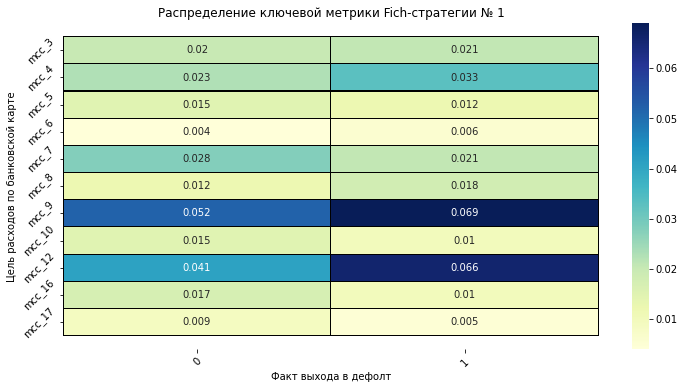

In [ ]:
df_temp = pd.read_parquet(Fich_full_PATH + 'transactions_month_train.parquet')
df_temp = df_temp[[x for x in df_temp.columns if 'mcc' in x]]
df_temp = df_temp.join(df_flag.iloc[:,[0,2]].set_index('app_id', drop = True), 
                       how = 'left')
df_temp = df_temp.fillna(0)

fine_table(df_temp.iloc[:,[2,3,4,5,6,7,8,9,10,14,15,-1]
                       ].groupby(['flag']).mean().T.round(3),
           title = 'Распределение ключевой метрики Fich-cтратегии № 1', 
           x_l   = 'Факт выхода в дефолт', 
           y_l   = 'Цель расходов по банковской карте')

Уровень дефолтности кредитных карт в зависимоcти от динамики изменения структуры расходов по карте различается существенно.

#### 4.3.1.3.  Фильтр наблюдений, в отношении которых недостаточно данных для использования в модели

В отношении fich стратегии № 1 непригодными для использования в модели признаются данные:

- транзакции, совершенные ранее чем за 30 дней до заявки на кредитную карту,
- клиенты прекратившие совершать расходные транзакции ранее чем за 30 дней до заявки на кредитную карту;
- все приходные и информационные транзакции вне зависимости от даты их совершения

In [ ]:
df_temp                     = pd.read_parquet(Fich_info_PATH+'info_train.parquet')
df_temp.loc['summa']        = df_temp.sum()
df_temp                     = df_temp.iloc[-1].T
df_filt                     = pd.DataFrame()
df_filt.loc[:,'Транзакции'] = [df_temp[0], df_temp[3]]
df_filt.loc[:,'Клиенты']    = [df_temp[4], df_temp[7]]
df_filt.loc[:,'Дефолты']    = [df_temp[8], df_temp[11]]
df_filt.loc[:,'Показатель'] = ['В исходном датасете', 'В модель, abs']
df_filt                     = df_filt.set_index(['Показатель'], drop=True)
df_filt.loc['Фильтр']       = df_filt.iloc[0,:3]-df_filt.iloc[1,:3]
df_filt.loc[:,'% дефолтов'] = (df_filt['Дефолты']*100/df_filt['Клиенты']).round(2)
df_filt.loc['В Модель, %']  = (100*df_filt.iloc[1,:3]/df_filt.iloc[0,:3]
                                                        ).round(2).tolist()+['']
df_filt                     = df_filt.iloc[[0,2,1,3],:]
df_filt.iloc[:3,:3]         = df_filt.iloc[:3,:3].astype(int).astype(str)

print('Сведения об объеме данных, преобразованных в рамках Fich - cтратегии 1' )
df_filt

Сведения об объеме данных, преобразованных в рамках Fich - cтратегии 1


,Транзакции,Клиенты,Дефолты,% дефолтов
Показатель,,,,
В исходном датасете,270450065,963811,26577,2.76
Фильтр,244357644,140080,3427,2.45
"В модель, abs",26092421,823731,23150,2.81
"В Модель, %",9.65,85.47,87.11,


#### 4.3.1.4.  Код обработки данных

In [ ]:
def extract_agg_full_model(t_frame: pd.DataFrame) -> pd.DataFrame:

    t_frame.drop_duplicates(keep='last')
    
    # приведение суммы транзакции к рублям
    t_frame['amnt']   = pd.Series(np.exp(t_frame['amnt']*17.8209)-1).astype('int')
    
    # только транзакции по расходам за последние 90 дней
    t_frame=t_frame.loc[(t_frame['income_flag']==1)&
                        (t_frame['days_before']<91)] 
                        
    # расчет средней суммы расходов по клиенту
    app_costs = t_frame.groupby(['app_id']).agg(
                                {'amnt': [  lambda x: np.sum(x),
                                            lambda x: np.max(x)
                                         ]}).reset_index()

    app_costs.columns = ['app_id', 'amnt_sum', 'amnt_max']
    t_frame             = pd.merge(t_frame, app_costs,on = 'app_id',how = 'left')

    #  расчет метрики в модель - расходы по признаку за последний месяц
    #  к среднемесячным расходам клиента
    t_frame                 = t_frame.loc[(t_frame['days_before']<31)]
    t_frame['amnt_norm']    = t_frame['amnt'] * 3 / t_frame['amnt_sum']                                 
    t_frame                 = t_frame.loc[:,['app_id', 'amnt_norm','mcc']]
    prept = []
    for i in t_frame.columns[2:]:
        pt = pd.pivot_table(data= t_frame, 
                        values  = 'amnt_norm',
                        index   = 'app_id',
                        columns = i, 
                        aggfunc = 'sum',
                        fill_value = 0)
        pt.columns = [i + '_' + str(x) for x in pt.columns]
        prept.append(pt)

    prept= pd.concat (prept, axis =1)
    prept= pd.merge(prept, app_costs.set_index('app_id'), 
                    right_index=True, left_index=True,
                    how='left')

    return prept

### 4.3.2.  Fich - cтратегия № 2 (последний крупный платеж)

#### 4.3.2.1.  Содержание и базовые метрики

Одним из ключевых факторов, предшествующих выходу в дефолт по кредитной карте являются события, которые сопровождаются крупными расходами перед заявкой.  Например, если цель получения кредита по карте связана: а) с недостатком финансирования по незаконченному крупному проекту (ремонт), б)  серийными крупными покупками в) получением крупного кредита / возмещение картой расходов по первоначальному взносу за автомобиль или ипотеку и %

Предмет исследования:
*   насколько существенна для клиента сумма самой крупной транзакции по карте
*   период с даты крупной транзакции до даты запроса на кредитную карту

Метрика исследования:
*   Сумма самой крупной транзакции за период наблюдений к среднемесячной сумме расходов клиента за период наблюдений
Дополнительно использована метрика периода с даты последней транзакции в датасете по клиенту до даты кредитной заявки (чтобы отметить клиентов, которые картой в последние недели перд заявкой не пользовались (расходные операции не осуществляли)

#### 4.3.2.2. Обоснование 

Распределение ключевой метрики  (отношение нормированной максимальной суммы покупки к среднемесячным расходам клиента)  в подгруппах кредитов с дефолтом и кредитов без дефолта

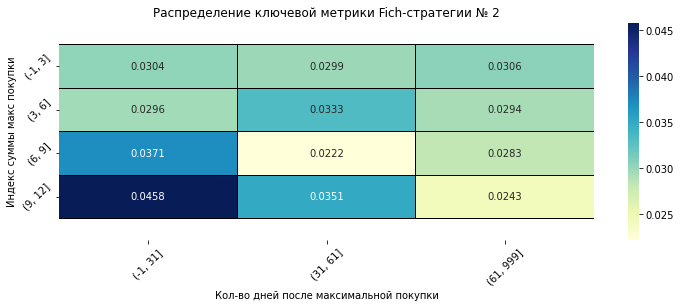

In [ ]:
df_temp = pd.read_parquet(Fich_short_PATH + 'trans_train.parquet').fillna(0)

df_temp['amnt_max_norm_group']           = pd.cut(df_temp.amnt_max_norm, 
                                                  [-1,3,6,9,12,24, 999])
df_temp['days_from_last_transact_group'] = pd.cut(df_temp.days_from_last_transact, 
                                                  [-1,7,14,28, 61,91, 999])
df_temp['days_from_max_group']           = pd.cut(df_temp.days_from_max, 
                                                  [-1,31,61,999])
  
df_temp = df_temp.join(df_flag.iloc[:,[0,2]].set_index('app_id', drop = True), 
                       how = 'left')

fine_pivot(val  = 'flag', ind = 'amnt_max_norm_group', 
           col  = 'days_from_max_group', 
           aggf = 'mean', 
           data =  df_temp, 
           title = 'Распределение ключевой метрики Fich-cтратегии № 2', 
           x_l   = 'Кол-во дней после максимальной покупки', 
           y_l   = 'Индекс суммы макс покупки')

Уровень дефолтности кредитных карт в зависимоти от суммы и даты последней крупной покупки различается существенно.

#### 4.3.2.3.  Фильтр наблюдений, в отношении которых недостаточно данных для использования в модели

В рамках fich - стратегии № 2 непригодными для модели признаются наблюдения в отношении которых в датасете отсутствуют расходные транзакции (в наличии только транзакции на приход  денег по карте  и информационные запросы)

In [ ]:
df_temp                     = pd.read_parquet(Fich_info_PATH+'info_train.parquet')
df_temp.loc['summa']        = df_temp.sum()
df_temp                     = df_temp.iloc[-1].T
df_filt                     = pd.DataFrame()
df_filt.loc[:,'Транзакции'] = [df_temp[0], df_temp[2]]
df_filt.loc[:,'Клиенты']    = [df_temp[4], df_temp[6]]
df_filt.loc[:,'Дефолты']    = [df_temp[8], df_temp[10]]
df_filt.loc[:,'Показатель'] = ['В исходном датасете', 'Клиенты без расходов']
df_filt                     = df_filt.set_index(['Показатель'], drop=True)

df_filt.loc['В Модель, абс']= df_filt.iloc[0,:3]-df_filt.iloc[1,:3]
df_filt.loc[:,'% дефолтов'] = (df_filt['Дефолты']*100/df_filt['Клиенты']).round(2)
df_filt.loc['В Модель, %']  = (100*df_filt.iloc[2,:3]/df_filt.iloc[0,:3]
                                                        ).round(2).tolist()+['']
df_filt.iloc[:3,:3]         = df_filt.iloc[:3,:3].astype(int).astype(str)
print('Сведения об объеме данных, преобразованных в рамках Fich - cтратегии 2' )
df_filt

Сведения об объеме данных, преобразованных в рамках Fich - cтратегии 2


,Транзакции,Клиенты,Дефолты,% дефолтов
Показатель,,,,
В исходном датасете,270450065,963811,26577,2.76
Клиенты без расходов,20609713,24265,542,2.23
"В Модель, абс",249840352,939546,26035,2.77
"В Модель, %",92.38,97.48,97.96,


#### 4.3.2.4. Код обработки данных

In [ ]:
def extract_agg_short_model(t_frame: pd.DataFrame) -> pd.DataFrame:

    t_frame.drop_duplicates(keep='last')

    # приведение суммы транзакции к рублям
    t_frame['amnt']   = pd.Series(np.exp(t_frame['amnt']*17.8209)-1).astype('int')

    # только транзакции по расходам
    t_frame           = t_frame.loc[t_frame['income_flag']==1] 

    # расчет максимальной суммы транзакции за период
    app_costs = t_frame.groupby(['app_id']).agg({'amnt': [  lambda x: np.sum(x),
                                                            lambda x: np.max(x)
                                                         ]}).reset_index()
    app_costs.columns = ['app_id', 'amnt_sum', 'amnt_max']

    # подвязка даты совершения транзакции максимальной по сумме
    app_costs = pd.merge(app_costs, t_frame.loc[:,['app_id', 'amnt','days_before']],
                         how = 'left',  left_on = ['app_id', 'amnt_max'] ,
                                        right_on =['app_id', 'amnt'])

    # расчет количества дней обслуживания клиента (с даты первой расходной 
    # транзакции клиента до даты последней  по датасету)
    app_days = t_frame.groupby(['app_id']).agg(
                                {'days_before': [lambda x: np.max(x),
                                                 lambda x: np.min(x)
                                                ]}).reset_index()
    app_days.columns       = ['app_id', 'days_max', 'days_min']
    app_days['days_delta'] = app_days['days_max'] - app_days['days_min']
    t_frame         = pd.merge(app_costs,app_days, on = 'app_id', how = 'left')

    # нормирование максимальной суммы транзакции по клиенту
    t_frame['amnt_max_norm']= t_frame['amnt_max'] * (t_frame['days_delta']/30.5
                                                    ) / t_frame['amnt_sum']                                 

    t_frame        = t_frame.loc[:,['app_id', 'amnt_max_norm', 
                                    'days_min','days_before']]
    
    t_frame.columns= ['app_id', 'amnt_max_norm', 
                      'days_from_last_transact','days_from_max']
        
    t_frame        = t_frame.groupby(['app_id', 
                                      'amnt_max_norm','days_from_last_transact']
                                     ).days_from_max.min().reset_index()

    return t_frame

## 4.4. Разделение модели на обучающую и тестовую выборки

В составе задания Чемпионата представлена тестовая выборка транзакций,  на которой осуществляется проверка правильности решений по задаче. 
Тестовая выборка представляет собой  выборку транзакций, составляющую ~ 50 % от train выборки по количеству наблюдений, смещенную по времени. 


В силу ключевых особенностей моделей в рамках fich стратегии № 1,  - использование малой части исходных данных датасета: 

- 9.65 % транзакций в отношении 
-  85.47 % клиентов  (см п. 4.3.1.) 
предсказание на тестовых данных возможно осуществить и проверить только на части тестовых данных, соответствующей условиям модели.
в рамках чемпионата AlfaBattle 2.0 возможность проверки модели только на части тестовых данных отсутствует,   проверка решения  может быть осуществлена только на тестовых данных в целом, что неприменимо для модели. 

В рамках данной работы я посчитал не правильным синтезировать ~ 14,53 % наблюдений случайными / правдоподобными значениями исключительно с целью проверки решения на тесте. масштаб искажений представился мне в таком случае непозволительно высоким.

В ходе экспериментов в рамках fich стратегии № 2 / проверки данных на тестовой выборке выявлено значительное смещение обучающих данных от тестовых по метрике  "Нормированная сумма самой крупной покупки клиента" в отношении целевой переменной.  Вввиду отсутствия данных о целевой переменной на тестовой выборке причины указанного несоответствия выявить не удалось / не установлены.


Проверка стабильности работы и предсказательной способности модели в рамках настоящего исследования осуществлялась с применением инструмента кросс валидации StratifiedKFold, библиотеки Scikit-learn на 5 фолдах.


StratifiedKFold выбран в силу того, что выборка наблюдений в целом несбалансирована относительно целевой переменной (доля плохих наблюдений ~ 2.7%),  при отсутствии балансировки целевых классов предсказания нестабильны.

Предполагая наличие скрытой сезонности в структуре расходов,  данные в train е  при кросс валидации не перемешивались (shuffle = False)

# 5. Моделирование

##  5.1. Гипотеза № 1   Light GBM  | Структура расходов по mcc

### 5.1.1.  Сборка датасета под модель

In [ ]:
df_train =  pd.read_parquet(Fich_full_PATH + 'transactions_month_train'+'.parquet')

In [ ]:
X = df_train.loc[:,[x for x in df_train.columns if 'mcc' in x]].fillna(0)
y = X.join(df_flag.set_index('app_id'), how="left")['flag'].values.reshape(-1,1)

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_sc   = scaler.transform(X)

In [ ]:
bsb = BorderlineSMOTE()
X_sm, y_sm = bsb.fit_resample(X_sc, y)

In [ ]:
merged_data  = pd.concat(   [pd.DataFrame(data    = X_sm, 
                                          columns = X.columns),
                             pd.DataFrame(data    = y_sm,
                                          columns = ['flag'])],
                             axis = 1)

merged_data.head(1)         

,mcc_1,mcc_2,mcc_3,mcc_4,mcc_5,mcc_6,mcc_7,mcc_8,mcc_9,mcc_10,mcc_12,mcc_13,mcc_14,mcc_15,mcc_16,mcc_17,mcc_18,mcc_19,mcc_20,mcc_21,mcc_22,mcc_23,mcc_24,mcc_25,mcc_26,mcc_27,mcc_28,mcc_29,mcc_30,mcc_31,mcc_32,mcc_33,mcc_34,mcc_35,mcc_36,mcc_37,mcc_38,mcc_39,mcc_40,mcc_41,...,mcc_71,mcc_72,mcc_73,mcc_74,mcc_75,mcc_76,mcc_77,mcc_78,mcc_79,mcc_80,mcc_81,mcc_82,mcc_83,mcc_84,mcc_85,mcc_86,mcc_87,mcc_88,mcc_89,mcc_90,mcc_91,mcc_92,mcc_93,mcc_94,mcc_95,mcc_96,mcc_97,mcc_98,mcc_99,mcc_100,mcc_101,mcc_102,mcc_103,mcc_104,mcc_105,mcc_106,mcc_107,mcc_108,mcc_11,flag
0,-0.019239,-0.514247,-0.308302,-0.255742,-0.236151,-0.141872,-0.280398,-0.089944,-0.265147,-0.224271,-0.236815,-0.113975,-0.141009,-0.127879,-0.181924,-0.146966,-0.044053,-0.100987,-0.071143,-0.082955,-0.140799,-0.024846,-0.102186,-0.090653,-0.109328,-0.066899,-0.081239,-0.056015,-0.095643,-0.085667,-0.07219,-0.093469,-0.086959,-0.126301,-0.108653,-0.102156,-0.101087,-0.103988,-0.086285,-0.089983,...,-0.039864,-0.02933,-0.046081,-0.053764,-0.054553,-0.028271,-0.061533,0.0,-0.050139,-0.06744,-0.043005,-0.045863,-0.038266,-0.055048,-0.041217,-0.027461,-0.057949,-0.040278,-0.059866,-0.014002,-0.016572,-0.035338,-0.045561,-0.030946,-0.032745,-0.04593,-0.021324,-0.026354,-0.038151,-0.033359,-0.036495,-0.039714,-0.032859,-0.043264,-0.015021,-0.026447,-0.027306,-0.142992,-0.001251,0


In [ ]:
features = X.columns
targets  = y_sm

### 5.1.2. Обучение модели

In [ ]:
def lgb_model(data , tree_params = {}):

    cv          = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
    oof         = np.zeros(len( data))
    train_preds = np.zeros(len( data))
    tree_params = tree_params
    models      = []

    for fold_, (train_idx, val_idx) in enumerate(cv.split(  data, targets), 1):
        print(f'Training with fold {fold_} started.')
        lgb_model  = lgb.LGBMClassifier(**tree_params)
        train, val =    data.iloc[train_idx],   data.iloc[val_idx]
    
        lgb_model.fit(train[features], train.flag.values, 
                  eval_set=[(val[features], val.flag.values)],
                  early_stopping_rounds=50, verbose=50)
    
        oof[val_idx]   = lgb_model.predict_proba(val[features])[:, 1]
        train_preds[train_idx] += lgb_model.predict_proba(train[features]
                                                      )[:, 1] / (cv.n_splits-1)

        models.append(lgb_model)
        print(f'Training with fold {fold_} completed.')
    print('Train roc-auc', roc_auc_score(targets, train_preds))
    print('CV roc-auc',    roc_auc_score(targets, oof))

In [ ]:
lgb_model(data = merged_data, tree_params     = {   'objective': 'binary',
                                                    'metric':       'auc',
                                                    'learning_rate': 0.03,
                                                    'max_depth':        4,
                                                    'reg_lambda':       1,
                                                    'num_leaves':      32,
                                                    'n_jobs':          5,
                                                    'n_estimators':  1000 })

Training with fold 1 started.
Training until validation scores don't improve for 50 rounds.
[50]	valid_0's auc: 0.770131
[100]	valid_0's auc: 0.794721
[150]	valid_0's auc: 0.811085
[200]	valid_0's auc: 0.822875
[250]	valid_0's auc: 0.831497
[300]	valid_0's auc: 0.837655
[350]	valid_0's auc: 0.842858
[400]	valid_0's auc: 0.84742
[450]	valid_0's auc: 0.85105
[500]	valid_0's auc: 0.85441
[550]	valid_0's auc: 0.857377
[600]	valid_0's auc: 0.859919
[650]	valid_0's auc: 0.86206
[700]	valid_0's auc: 0.864152
[750]	valid_0's auc: 0.865972
[800]	valid_0's auc: 0.867488
[850]	valid_0's auc: 0.869059
[900]	valid_0's auc: 0.870677
[950]	valid_0's auc: 0.872052
[1000]	valid_0's auc: 0.873337
Did not meet early stopping. Best iteration is:
[1000]	valid_0's auc: 0.873337
Training with fold 1 completed.
Training with fold 2 started.
Training until validation scores don't improve for 50 rounds.
[50]	valid_0's auc: 0.772504
[100]	valid_0's auc: 0.796055
[150]	valid_0's auc: 0.812516
[200]	valid_0's auc:

##  5.2. Гипотеза № 2  SGD Classifier  | Структура расходов по mcc

### 5.2.1.  Сборка датасета под модель

In [ ]:
X = df_train.loc[:,[x for x in df_train.columns if 'mcc' in x]].fillna(0)
y = X.join(df_flag.set_index('app_id'), how="left")['flag'].values.reshape(-1,1)

In [ ]:
scaler = StandardScaler()
X_sc   = scaler.fit_transform(X)

In [ ]:
merged_data  = pd.concat(   [pd.DataFrame(data    = X_sc, 
                                          columns = X.columns),
                             pd.DataFrame(data    = y,
                                          columns = ['flag'])],
                             axis = 1)        

In [ ]:
features = X.columns
targets  = y

### 5.2.2. Обучение модели

In [ ]:
def classifier_2(data   = merged_data, 
                 mod    = SGDClassifier(tol=1e-3, eta0=0.001), 
                 params = {}):
    
    X    = data.iloc[:,:-1].fillna(0)
    y    = data.iloc[:,-1].values.reshape(-1,1)

    clf = GridSearchCV(mod, params)
    clf.fit(X,y)
    print('Точность модели  = ', (clf.best_score_*100).round(5))
    print('Лучшие настройки модели = ', clf.best_params_)

In [ ]:
classifier_2(data = merged_data, 
             mod    = SGDClassifier(tol=1e-3, eta0=0.001), 
             params = { 'loss':('squared_loss', 'huber', 'epsilon_insensitive'), 
                        'penalty':('l1', 'l2')})

Точность модели  =  97.18962
Лучшие настройки модели =  {'loss': 'huber', 'penalty': 'l1'}


###5.2.3. Устойчивость модели

Для оценки устойчивости модели произведены следующие действия:
- модель обучена на данных каждого из первых 3 месяцев  ( 3 х 8,33 %) наблюдений,
- протестирована на каждом из следующих месяцев (пакете из последовательных 8.33 % наблюдений)

и оценена точность модели при удалении периода наблюдений с течением времени.



построение расчета осуществлялась на тестовых данных без учета влияния фактора перехода клиента на обслуживание в другой банк,  потери информативности модели вследствие физической утраты данных.

In [ ]:
scaler         = StandardScaler()
model          = SGDClassifier(tol=1e-3, eta0=0.001)
df_period_2    = pd.DataFrame(columns = list(range(9)))

In [ ]:
merged_data['period_group'] = pd.qcut(merged_data.index.astype(int), 12, 
                                      labels=range(12), duplicates='drop')

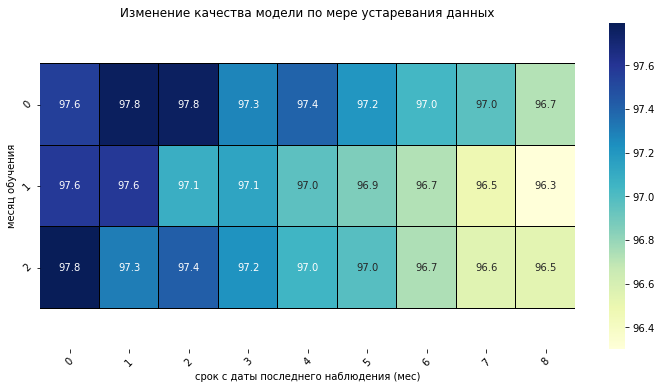

In [ ]:
for mnth_1 in range(3):

    df      = merged_data.loc[merged_data.period_group == mnth_1].iloc[:,:-1]
    X_train = scaler.fit_transform(df.iloc[:,:-1])
    y_train = df.iloc[:,-1].values.reshape(-1,1)

    model.fit(X_train,y_train)

    scores = []
    for mnth_2 in range(9):
        df    = merged_data.loc[merged_data.period_group==mnth_1+mnth_2].iloc[:,:-1]
        X_test= scaler.fit_transform(df.iloc[:,:-1])
        y_test= df.iloc[:,-1].values.reshape(-1,1)
        scores.append((100*model.score(X_test, y_test)).round(3))
    df_period_2.loc[mnth_1] = scores

fine_table(df_period_2, 
            title = 'Изменение качества модели по мере устаревания данных', 
            x_l   = 'срок с даты последнего наблюдения (мес)',
            y_l   = 'месяц обучения')

## 5.3. Гипотеза № 3 SGD Classifier | Крупная покупка

### 5.3.1. Сборка датасета под модель

In [ ]:
df =  pd.read_parquet(Fich_short_PATH + 'trans_train.parquet')

In [ ]:
X = StandardScaler().fit_transform(df)
y = df.join(df_flag.set_index('app_id'), how="left").iloc[:,-1].values.reshape(-1,1)

merged_data  = pd.concat(   [pd.DataFrame(data    = X, 
                                          columns = df.columns),
                             pd.DataFrame(data    = y,
                                          columns = ['flag'])],
                             axis = 1)     

### 5.3.2.  Обучение модели

In [ ]:
classifier_2(data   = merged_data.fillna(0), 
             mod    = SGDClassifier(tol=1e-3, eta0=0.001), 
             params = { 'loss':('squared_loss', 'huber', 'epsilon_insensitive'), 
                        'penalty':('l1', 'l2')})

Точность модели  =  97.07289
Лучшие настройки модели =  {'loss': 'squared_loss', 'penalty': 'l1'}


###5.3.3. Устойчивость модели

Для оценки устойчивости модели произведены следующие действия:
- модель обучена на данных каждого из первых 3 месяцев  ( 3 х 8,33 %) наблюдений,
- протестирована на каждом из следующих месяцев (пакете из последовательных 8.33 % наблюдений)

и оценена точность модели при удалении периода наблюдений с течением времени.



построение расчета осуществлялась на тестовых данных без учета влияния фактора перехода клиента на обслуживание в другой банк,  потери информативности модели вследствие физической утраты данных.

In [ ]:
scaler         = StandardScaler()
model          = SGDClassifier(tol=1e-3, eta0=0.001)
df_period_1    = pd.DataFrame(columns = list(range(9)))

merged_data['period_group'] = pd.qcut(merged_data.index.astype(int), 12, 
                                      labels=range(12), duplicates='drop')
df_      = merged_data.loc[merged_data.period_group == 0].iloc[:,:-1].fillna(0)
X_train  = df_.iloc[:,:-1]
y_train  = df_.iloc[:,-1].values.reshape(-1,1)

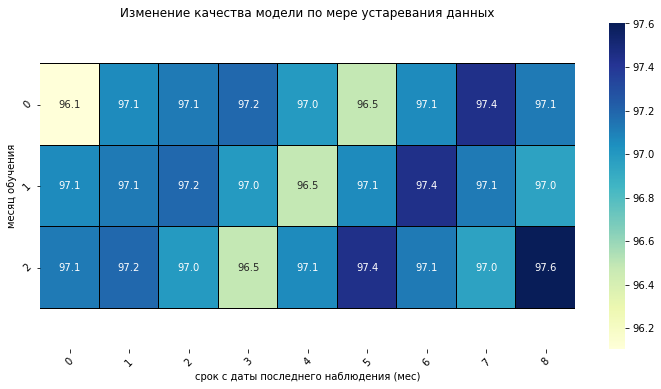

In [ ]:
scaler         = StandardScaler()
model          = SGDClassifier(tol=1e-3, eta0=0.001)
df_period_1    = pd.DataFrame(columns = list(range(9)))

merged_data['period_group'] = pd.qcut(merged_data.index.astype(int), 12, 
                                      labels=range(12), duplicates='drop')

for mnth_1 in range(3):

    df_      = merged_data.loc[merged_data.period_group == mnth_1].iloc[:,:-1].fillna(0)
    X_train  = scaler.fit_transform(df_.iloc[:,:-1])
    y_train  = df_.iloc[:,-1].values.reshape(-1,1)

    model.fit(X_train,y_train)

    scores = []

    for mnth_2 in range(9):
        df_      = merged_data.loc[merged_data.period_group == mnth_1 + mnth_2].iloc[:,:-1].fillna(0)
        X_test   = scaler.fit_transform(df_.iloc[:,:-1])
        y_test   = df_.iloc[:,-1].values.reshape(-1,1)
        scores.append((100*model.score(X_test, y_test)).round(3))
    df_period_1.loc[mnth_1] = scores

fine_table(df_period_1, 
            title = 'Изменение качества модели по мере устаревания данных', 
            x_l   = 'срок с даты последнего наблюдения (мес)',
            y_l   = 'месяц обучения')

## 5.4.  Гипотеза № 4 SGD Classifier  + PCA| Крупная покупка

### 5.4.1. Сборка датасета под модель

In [ ]:
df =  pd.read_parquet(Fich_short_PATH + 'trans_train.parquet').set_index('app_id', drop=True)

In [ ]:
X  = StandardScaler().fit_transform(df)
y  = df.join(df_flag.set_index('app_id'), how="left").iloc[:,-1].values.reshape(-1,1)

merged_data  = pd.concat(   [pd.DataFrame(data    = X, 
                                          columns = df.columns),
                             pd.DataFrame(data    = y,
                                          columns = ['flag'])],
                             axis = 1)     

### 5.4.2. Обучение модели

In [ ]:
from sklearn.decomposition import PCA

pca                 = PCA(n_components = 2) 
merged_data_scl_pca = pd.concat([pd.DataFrame(pca.fit_transform(
                                merged_data.iloc[:,:-1]),
                                columns = list(range(2))),
                                merged_data.iloc[:,-1]],
                                axis = 1)

In [ ]:
classifier_2(data   = merged_data_scl_pca, 
             mod    = SGDClassifier(tol=1e-3, eta0=0.001), 
             params = { 'loss':('squared_loss', 'huber', 'epsilon_insensitive'), 
                        'penalty':('l1', 'l2')})

Точность модели  =  97.22931
Лучшие настройки модели =  {'loss': 'squared_loss', 'penalty': 'l1'}


###5.4.3. Устойчивость модели

Для оценки устойчивости модели произведены следующие действия:
- модель обучена на данных каждого из первых 3 месяцев  ( 3 х 8,33 %) наблюдений,
- протестирована на каждом из следующих месяцев (пакете из последовательных 8.33 % наблюдений)

и оценена точность модели при удалении периода наблюдений с течением времени.



построение расчета осуществлялась на тестовых данных без учета влияния фактора перехода клиента на обслуживание в другой банк,  потери информативности модели вследствие физической утраты данных.

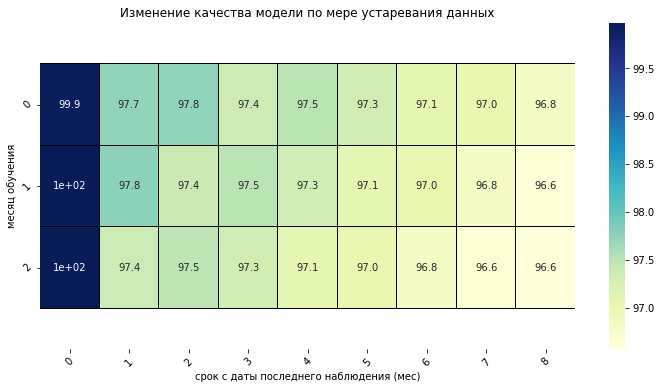

In [ ]:
model     = RandomForestClassifier(n_estimators=100, n_jobs = -1)
df_period = pd.DataFrame(columns = list(range(9)))

merged_data_scl_pca['period_group'] = pd.qcut(merged_data_scl_pca.index.astype(int), 
                                              12,  labels=range(12), duplicates='drop')

for mnth_1 in range(3):
    df_      = merged_data_scl_pca.loc[merged_data_scl_pca.period_group == mnth_1].iloc[:,:-1].fillna(0)
    X_train  = scaler.fit_transform(df_.iloc[:,:-1])
    y_train  = df_.iloc[:,-1].values.reshape(-1,1)

    model.fit(X_train,y_train)

    scores = []
    for mnth_2 in range(9):
        df_      = merged_data_scl_pca.loc[merged_data_scl_pca.period_group == mnth_1 + mnth_2].iloc[:,:-1].fillna(0)
        X_test   = scaler.fit_transform(df_.iloc[:,:-1])
        y_test   = df_.iloc[:,-1].values.reshape(-1,1)
        scores.append((100*model.score(X_test, y_test)).round(3))
    df_period.loc[mnth_1] = scores

fine_table(df_period, 
            title = 'Изменение качества модели по мере устаревания данных', 
            x_l   = 'срок с даты последнего наблюдения (мес)',
            y_l   = 'месяц обучения')

#6. Выбор лучшего решения / в бой


## Сравнение результатов экспериментов

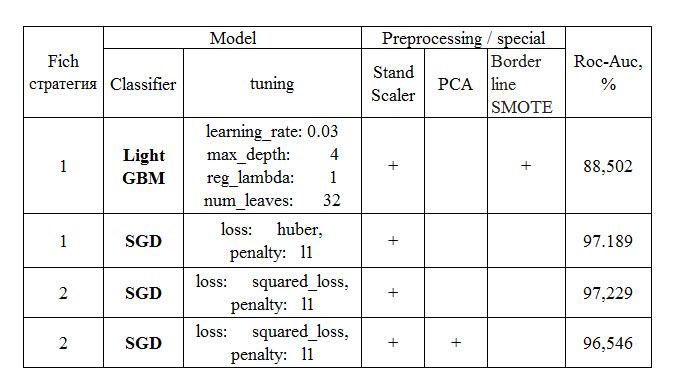

Наилучшими решениями в рамках проведенных экспериментов я считаю решениt c использованим SGD Classifier в силу высокого и стабильного результата работы модели при минимальном искажении признаков.



# 7. Выводы 


##  7.1.  Ключевые инструменты достижения целей исследования  / точность модели

### 7.1.1. Feature selection

Высокая точность модели (по сравнению с решениями аналогами) обеспечена за счет применения следующих методов конструирования признаков модели:

- применение только тех метрик, которые на основании практического опыта работы с просрочкой наиболее точно описывают типовые паттерны поведения в рамках мошеннических действий с банковскими картами

Применяемый метод обеспечил исследование / включение в модель очень ограниченного набора признаков, отобранных точно под задачу 

В рамках отбора признаков модели устранено прямое сопоставление абсолютных метрик отдельных клиентов / транзакций клиентов в пользу универсальных метрик, нормироваанных к средней сумме расходов каждого из клиентов. 
В случае, если этого не сделать и сравнить структуру платежей отдельных клиентов в абсолютных суммах, то по сути в содержание признаков добавится содержание различий клиентов по уровню дохода и структуре потребления (количество таких особенностей неисчислимо) - признаков,  которые прямо или косвенно содержатся в характеристиках каждой транзакции,  но не объясняют целевую переменную

### 7.1.2. Preprocessing

В ходе настоящего исследования опробованы методы следующие методы изменения состава данных под модель / сделаны следующие выводы:

#### 7.1.2.1. Imblearn sampling


В ходе тестирования модели опробованы следующие  методы сэмплинга:  

- over_sampling  BorderlineSMOTE библиотеки imblearn,  содержанием которого является добавление в датасет "плохих" наблюденний (меньшинства), расположенных в непосредственной близости с наблюдениями большинства с целью  дать классификатору возможность более четко различать эти пограничные наблюдения. Использование указанного метода привело к сущестенному / кратному ухудшению метрик модели, вновь сгенерированные искусственные наблюдения восприняты моделью как шум;
- under_sampling  InstanceHardnessThreshold + LogisticRegression библиотеки imblearn,  содержанием которого является построение гиперплоскости отсечения между "плохими" и "хорошими" наблюдениями методом логистической регрессии, исключение части наблюдений класса большинства "хороших" наблюдений  стоящих в непосредственной близости с плоскостью отсечения. После использования метода на всей выборке, модель показала наилучшие результаты точности предсказания, поскольку метод позволяет исключить на уровне сэмплинга все "спорные" наблюдения по понятному критерию, оставив модели наиболее очевидные различия между пограничными значениями. использование метода на тестовых данных / в бою крайне сомнительно  и исключено из выводов по исследованию.

#### 7.1.2.2. PCA

В силу особенностей датасета в части признаков структуры расходов по mcc кодам  предполагает по сути, что некоторые из признаков очевидно схожи по сути отражаемых явлений (например: расходы на лечение и расходы на лекарства) но эти признаки классификации никак не возможно идентифицировать в датасете, где коды mcc закодированы. Возможность реклассификации признаков целей платежа (mcc) подтверждается тем, что использование метода PCA и сокращение количества признаков до 10 практически не ухудшает качество модели.

### 7.1.3. Построение модели


Наилучший по точности и наиболее стабильный результат предсказания достигается при использовании линейного классификатора SVM, обученного методом стохастического градиентного спуска  при использовании инструментов L1 регуляризации (SGD Classifier библиотеки Scikit learn)

## 7.2. Надежность модели

В рамках исследования надежности модели достигнуты следующие противоречивые выводы:

### 7.2.1.  исследования на обучающей / train  выборке

 внутри обучающей / train выборки данных результаты предсказания модели  вполне предстказуемы. предсказательная способность модели незначительно сокращается по мере снижения метрики актуальности данных.  Проверялось так:

Обучение модели на данных первых 3 месяцах наблюдений train выборки. Тестирование на данных каждого из следующих месяцев наблюдений train выборки.

Все модели обучения строились c использованием  инструментов кросс валидации, предусматривающей сохранение долей классов "плохих" и "хороших" наблюдений (ввиду несбалансированности классов) стандартным методом StratifiedKFold библиотеки sklearn.model_selection.


### 7.2.2. исследования на тестовой выборке

По  заявленным условиям чемпионата, тестовая выборка смещена от train на 6 месяцев вперед, относительно последней записи train выборки.

В случае, если данные train и test  были бы сопоставимы полностью,  логично предположить, что модель, обученная на данных последнего месяца наблюдений train выборки покажет приемлемый результат на первых записях test`a. Условия чемпионата не позволяют проверить качество работы модели, обученной на последнем месяце train выборки применительно к первому месяцу наблюдений test`a, чтобы полностью проверить выводы о стабильности работы модели на коротких горизонтах предсказания. Гипотеза не подтверждена. 

Объяснение в рамках настоящей работы не найдено.

Предположения:  

- представленная модель не работает на предсказания свыше 6 месяцев вперед, ввиду того, что учитывает только текущее ситуативное состояние платежного статуса Клиента / Заёмщика;

- алгоритмы искажения тестовых данных, используемые для адаптации бизнес задачи к условиям чемпионата не подразумевали возможность применения сложных преобразований по полю сумма транзакции (сдвиг структуры покупок к средней) 

## 7.3.  Условия применения  модели

Модель может быть использована только в отношении клиентов, по которым в наличии информация о структуре платежей по карте за последние 3 месяца перед заявкой на кредит(проводящих регулярно расходные операции).

Если такое условие не соблюдено и клиент перестал пользоваться картой,  то точность модели снижается вследствие 2 ключевых факторов:
- устаревание исходных данных для построения модели;
- возникновение новых изменений  в структуре поведения, которые реализовались, но о которых модели не известно.

Модель не работает на предсказания с горизонтом планирования выше 3-6 месяцев.

Данное условие легко зашивается в условие кредитного продукта и внутренний порядок выдачи банковскийх карт

## 7.4. Пути улучшения качества модели 

Работу модели можно улучшить за счет добавления в модели следующих признаков: 

а) Признаки транзакций (подобных представленным в датасете с учетом более глубокой детализации):

- транзакции по приходу (особенно в части кодов выдач (иных)  кредитов и  поступлений на карту наличных);
- различения операций по дебетовым и кредитовым банковским картам (свои деньги / заемные деньги);
- расширение периода исследований  - до 3 месяцев.

- добавление в состав моделей косвенных признаковх социального профиля, содержащихся в составе информации о транзакциях (например: количество посещенных стран и городов за период, склонность к покупкам в определенные дни и часы,  интенсивность использования отдельных банковских продуктов)  в сочетании с реклассификацией категориальных признаков (в случае если таковая информация будет в наличии),  ансамблирование моделей косвенных признаков поведения с базовой моделью настоящего исследования

б) очевидно доступных признаков клиента - базовые социальные метрики из CRM (пол, возраст, семейное положение)





## 7.5. Следующие направления исследований


Следующими методами исследований признаков, представленных в настоящей работе, в части
- вектор смещения структуры индивидуальных расходов по mcc кодам  к средней
- матрица структуры расходов в динамике

будут :  

- алгоритмы классификации / выявления новых плохих наблюдений по критерию простой / буквальной схожести векторов / матриц с плохими наблюдениями в прошлом

- использование инструментов глубокого обучения (RNN) в отношении обозначенного пространства признаков


Направления следующих исследований на базе примененных моделей:
- предсказание (вероятности совершения) следующего действия потребителя исходя из трендов в изменении его потребительского поведения, 
- предсказание готовности к совершению следующего потребительского действия

# 8. Использованные материалы и литература:

## 8.1.   Реализованные решения задач поведенческого скоринга:



- Baseline чемпионата AlfaBattle 2.0  https://github.com/smirnovevgeny/AlfaBattle2.0

 -Baseline /презентации  https://www.youtube.com/watch?v=A3S9ecblw98&list=PLrKK62YTZRia0nk7HDFDTkjwmZwb6suzZ 
 
- Лучшее публичное решение /код :  https://github.com/aizakharov94/AlfaBattle_task2

- Лучшее публичное решение /презентации:  https://youtu.be/A7ha6mRUnhc?t=6481

- Kaggle - публичные решения: https://www.kaggle.com/sokolovaleks/alfabattle2-sandbox/code

- Telegram чат AlfaBattle 2.0: https://t.me/joinchat/EIjdMRShg4W_WPzMfkYC1Q


## 8.2. Исследования предметной области

*   Лестер.А.Пратт  Обманные операции в банковском деле.  		     Москва, Перспектива, 1995
*   Наим Сиддики    Скоринговые карты для оценки кредитных рисков, Москва, Манн, Иванов и Фербер, 2014

